In [512]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from numpy import array


%matplotlib inline

In [2]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
data_dir = '/data'
filename = '/data.csv'

data_df = pd.read_csv('data/data.csv')

In [4]:
data_df.head()
print(data_df.shape)

(116, 44)


In [5]:
train = data_df[:100]
test = data_df[100:]

In [6]:
train1 = train.copy()

In [15]:
train1 = train1.drop(['year'], axis=1)

In [16]:
headers = list(train1.columns.values)

In [17]:
for header in headers:
    print(header)

annual-min
jan-min
feb-min
mar-min
apr-min
may-min
jun-min
jul-min
aug-min
sep-min
oct-min
nov-min
dec-min
annual-max
jan-max
feb-max
mar-max
apr-max
may-max
jun-max
jul-max
aug-max
sep-max
oct-max
nov-max
dec-max
annual-mean
jan-mean
feb-mean
mar-mean
apr-mean
may-mean
jun-mean
jul-mean
aug-mean
sep-mean
oct-mean
nov-mean
dec-mean
jun-rain
jul-rain
aug-rain
sept-rain


# Simple Exponential Smoothing
While working on time series problem, one needs  to attach larger weights to more recent observations than to observations from the distant past. The technique which works on this principle is called Simple exponential smoothing. Forecasts are calculated using weighted averages where the weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations:

$$ŷ_(t+1|t) =  α*y(t) + α(1-α)*y(t-1) + α(1-α)^{2} * y(t-2) + ....$$

where 0≤ α ≤1 is the smoothing parameter.
The one-step-ahead forecast for time T+1 is a weighted average of all the observations in the series y1,…,yT. The rate at which the weights decrease is controlled by the parameter α.

In [42]:
y_hat_exp = test.copy()
for header in headers:
    fit_exp = SimpleExpSmoothing(np.asarray(train1[header])).fit(smoothing_level=0.3, optimized=False)
    y_hat_exp[header] = fit_exp.forecast(len(test))



In [43]:
y_hat

,year,annual-min,jan-min,feb-min,mar-min,apr-min,may-min,jun-min,jul-min,aug-min,...,jul-mean,aug-mean,sep-mean,oct-mean,nov-mean,dec-mean,jun-rain,jul-rain,aug-rain,sept-rain
100,2001,19.535394,13.295985,14.888691,17.573423,21.32757,23.429376,23.738114,23.789092,23.341553,...,27.506144,27.079065,26.671204,25.278495,22.530971,19.548985,167.967564,316.439924,229.438425,157.819705
101,2002,19.535394,13.295985,14.888691,17.573423,21.32757,23.429376,23.738114,23.789092,23.341553,...,27.506144,27.079065,26.671204,25.278495,22.530971,19.548985,167.967564,316.439924,229.438425,157.819705
102,2003,19.535394,13.295985,14.888691,17.573423,21.32757,23.429376,23.738114,23.789092,23.341553,...,27.506144,27.079065,26.671204,25.278495,22.530971,19.548985,167.967564,316.439924,229.438425,157.819705
103,2004,19.535394,13.295985,14.888691,17.573423,21.32757,23.429376,23.738114,23.789092,23.341553,...,27.506144,27.079065,26.671204,25.278495,22.530971,19.548985,167.967564,316.439924,229.438425,157.819705
104,2005,19.535394,13.295985,14.888691,17.573423,21.32757,23.429376,23.738114,23.789092,23.341553,...,27.506144,27.079065,26.671204,25.278495,22.530971,19.548985,167.967564,316.439924,229.438425,157.819705
105,2006,19.535394,13.295985,14.888691,17.573423,21.32757,23.429376,23.738114,23.789092,23.341553,...,27.506144,27.079065,26.671204,25.278495,22.530971,19.548985,167.967564,316.439924,229.438425,157.819705
106,2007,19.535394,13.295985,14.888691,17.573423,21.32757,23.429376,23.738114,23.789092,23.341553,...,27.506144,27.079065,26.671204,25.278495,22.530971,19.548985,167.967564,316.439924,229.438425,157.819705
107,2008,19.535394,13.295985,14.888691,17.573423,21.32757,23.429376,23.738114,23.789092,23.341553,...,27.506144,27.079065,26.671204,25.278495,22.530971,19.548985,167.967564,316.439924,229.438425,157.819705
108,2009,19.535394,13.295985,14.888691,17.573423,21.32757,23.429376,23.738114,23.789092,23.341553,...,27.506144,27.079065,26.671204,25.278495,22.530971,19.548985,167.967564,316.439924,229.438425,157.819705
109,2010,19.535394,13.295985,14.888691,17.573423,21.32757,23.429376,23.738114,23.789092,23.341553,...,27.506144,27.079065,26.671204,25.278495,22.530971,19.548985,167.967564,316.439924,229.438425,157.819705


In [478]:
rmse_exp = {}
for header in headers:
    rmse_exp[header] = sqrt(mean_squared_error(test[header], y_hat_exp[header]))

rmse_exp

{'annual-min': 0.5132513590975231,
 'jan-min': 0.6665157046452513,
 'feb-min': 0.8806026708421039,
 'mar-min': 1.015602222782082,
 'apr-min': 0.8328656215104412,
 'may-min': 0.5684815367159812,
 'jun-min': 0.5039300206208394,
 'jul-min': 0.3459972223268492,
 'aug-min': 0.41679828566889154,
 'sep-min': 0.41923865374130037,
 'oct-min': 0.7289138717350783,
 'nov-min': 0.5869387599421291,
 'dec-min': 0.9010448856240822,
 'annual-max': 0.5807570993892286,
 'jan-max': 0.97691944182958,
 'feb-max': 1.43349528337312,
 'mar-max': 1.3539781306641319,
 'apr-max': 0.8877859013655024,
 'may-max': 0.6909737180277318,
 'jun-max': 0.7346333131789662,
 'jul-max': 0.48054961389241996,
 'aug-max': 0.4553696493250594,
 'sep-max': 0.3835067127283721,
 'oct-max': 0.6287592398944386,
 'nov-max': 0.6256138646394915,
 'dec-max': 0.7187415985188413,
 'annual-mean': 0.5432060461454536,
 'jan-mean': 0.748311289601709,
 'feb-mean': 1.117403224451074,
 'mar-mean': 1.3135687713563002,
 'apr-mean': 0.8484687905322217

#### smmothing_level = 0.5, 0.3, 0.1, 0.8 were used to study above model and smoothing_level value of 0.3 produced minimum rmse

# Holt’s Linear Trend method

Holt extended simple exponential smoothing to allow forecasting of data with a trend. It is nothing more than exponential smoothing applied to both level(the average value in the series) and trend. To express this in mathematical notation we now need three equations: one for level, one for the trend and one to combine the level and trend to get the expected forecast ŷ

### Forecast: $$ŷ(t+h|t) = l_t + h*b_t$$
### Level equation: $$l_t = α*y_t + (1-α)(l_(t-1) + b_(t-1)) $$
### Trend equation: $$b_t = <beta>*(l_t - l_(t-1)) + (1-<beta>)b_(t-1)  $$

As with simple exponential smoothing, the level equation here shows that it is a weighted average of observation and the within-sample one-step-ahead forecast The trend equation shows that it is a weighted average of the estimated trend at time t based on l(t)−l(t−1) and b(t−1), the previous estimate of the trend.

We will add these equations to generate Forecast equation. We can also generate a multiplicative forecast equation by multiplying trend and level instead of adding it. When the trend increases or decreases linearly, additive equation is used whereas when the trend increases of decreases exponentially, multiplicative equation is used.Practice shows that multiplicative is a more stable predictor, the additive method however is simpler to understand

In [46]:
y_hat_holt = test.copy()
#using holt algorith on each column
for header in headers:
    fit_holt = Holt(np.asarray(train1[header])).fit(smoothing_slope=0.3, smoothing_level=0.1)
    y_hat_holt[header] = fit_holt.forecast(len(test))

In [47]:
#view predicted values
y_hat_holt

,year,annual-min,jan-min,feb-min,mar-min,apr-min,may-min,jun-min,jul-min,aug-min,...,jul-mean,aug-mean,sep-mean,oct-mean,nov-mean,dec-mean,jun-rain,jul-rain,aug-rain,sept-rain
100,2001,19.717547,13.635111,15.367904,18.222340,20.913399,23.433069,24.086058,23.983555,23.598706,...,27.617015,27.205743,26.795301,24.949434,22.312852,19.697304,161.398898,369.407805,263.599564,207.296990
101,2002,19.751101,13.670860,15.435765,18.254987,20.941425,23.468106,24.107834,24.016850,23.606617,...,27.646172,27.215968,26.821417,24.984940,22.373363,19.691491,159.487195,375.785649,255.955147,211.572010
102,2003,19.784656,13.706608,15.503626,18.287633,20.969451,23.503144,24.129609,24.050146,23.614528,...,27.675330,27.226193,26.847533,25.020447,22.433875,19.685677,157.575491,382.163492,248.310730,215.847030
103,2004,19.818210,13.742356,15.571488,18.320280,20.997477,23.538181,24.151385,24.083441,23.622439,...,27.704488,27.236418,26.873650,25.055953,22.494387,19.679864,155.663788,388.541336,240.666313,220.122049
104,2005,19.851764,13.778104,15.639349,18.352927,21.025502,23.573218,24.173161,24.116736,23.630350,...,27.733645,27.246642,26.899766,25.091460,22.554899,19.674051,153.752084,394.919179,233.021896,224.397069
105,2006,19.885318,13.813852,15.707210,18.385573,21.053528,23.608256,24.194937,24.150032,23.638261,...,27.762803,27.256867,26.925882,25.126967,22.615411,19.668237,151.840381,401.297022,225.377479,228.672089
106,2007,19.918872,13.849601,15.775071,18.418220,21.081554,23.643293,24.216712,24.183327,23.646172,...,27.791960,27.267092,26.951998,25.162473,22.675923,19.662424,149.928678,407.674866,217.733062,232.947109
107,2008,19.952426,13.885349,15.842932,18.450866,21.109580,23.678331,24.238488,24.216622,23.654083,...,27.821118,27.277317,26.978115,25.197980,22.736434,19.656611,148.016974,414.052709,210.088645,237.222128
108,2009,19.985980,13.921097,15.910794,18.483513,21.137606,23.713368,24.260264,24.249918,23.661994,...,27.850275,27.287541,27.004231,25.233487,22.796946,19.650797,146.105271,420.430552,202.444228,241.497148
109,2010,20.019534,13.956845,15.978655,18.516160,21.165632,23.748405,24.282039,24.283213,23.669905,...,27.879433,27.297766,27.030347,25.268993,22.857458,19.644984,144.193567,426.808396,194.799811,245.772168


In [49]:
rmse_holt = {}
for header in headers:
    rmse_holt[header] = sqrt(mean_squared_error(test[header], y_hat_holt[header]))

rmse_holt

{'annual-min': 0.3797579779336885,
 'jan-min': 0.741064040992362,
 'feb-min': 0.9271712530295232,
 'mar-min': 0.7191733129414059,
 'apr-min': 0.846948871704078,
 'may-min': 0.5375378101517715,
 'jun-min': 0.39083041748898856,
 'jul-min': 0.3101971864846152,
 'aug-min': 0.2740548040954844,
 'sep-min': 0.5492528253094302,
 'oct-min': 0.6021010513591767,
 'nov-min': 0.6885584648265634,
 'dec-min': 0.9346774836414349,
 'annual-max': 0.47485758369839143,
 'jan-max': 0.9607607896471697,
 'feb-max': 1.1207856290221823,
 'mar-max': 1.1385133647408496,
 'apr-max': 0.916355935441412,
 'may-max': 0.6601700422306847,
 'jun-max': 0.7146184076951184,
 'jul-max': 0.4310764190825707,
 'aug-max': 0.41951650641708627,
 'sep-max': 0.38468796803525984,
 'oct-max': 0.8139188864772253,
 'nov-max': 0.5750148952791087,
 'dec-max': 0.6650486968789135,
 'annual-mean': 0.3950004110240436,
 'jan-mean': 0.6452102271644545,
 'feb-mean': 0.942761137630204,
 'mar-mean': 1.0291959240416375,
 'apr-mean': 0.856530724767

#### one can see that predictions are improving compared to simple exponential model. In holt, unlike to simple exponential model, we are getting different value for subsequent years. RMSE has improved for most of the temperature features while it has degraded for rainfall predictions. One reason for this could be that temperature displays more of a linear trend as compared to rainfall data

# Multivariate LSTM forecast model

In [316]:
#creating a separate dataset for LSTM
data_lstm = data_df.copy()

## LSTM dataset preparation

This involves normalizing the inputs

In [317]:
data_lstm.columns

Index(['year', 'annual-min', 'jan-min', 'feb-min', 'mar-min', 'apr-min',
       'may-min', 'jun-min', 'jul-min', 'aug-min', 'sep-min', 'oct-min',
       'nov-min', 'dec-min', 'annual-max', 'jan-max', 'feb-max', 'mar-max',
       'apr-max', 'may-max', 'jun-max', 'jul-max', 'aug-max', 'sep-max',
       'oct-max', 'nov-max', 'dec-max', 'annual-mean', 'jan-mean', 'feb-mean',
       'mar-mean', 'apr-mean', 'may-mean', 'jun-mean', 'jul-mean', 'aug-mean',
       'sep-mean', 'oct-mean', 'nov-mean', 'dec-mean', 'jun-rain', 'jul-rain',
       'aug-rain', 'sept-rain'],
      dtype='object')

In [318]:
#dropping year column from dataset
data_lstm = data_lstm.drop(['year'], axis=1)

In [319]:
all_data = data_lstm[data_lstm.columns.values].values.astype('float32')

In [320]:
print(all_data[0])
print(all_data[1])

[ 19.51  13.58  14.72  17.91  20.93  23.18  24.05  23.82  23.58  22.09
  20.2   16.16  13.41  28.96  22.4   24.14  29.07  31.91  33.41  33.18
  31.21  30.39  30.47  29.97  27.31  24.49  24.23  17.99  19.43  23.49
  26.41  28.28  28.6   27.49  26.98  26.26  25.08  21.73  18.95  99.3
 295.4  354.8  113.8 ]
[ 19.44  13.08  14.2   18.44  21.3   23.63  23.97  23.68  23.34  22.11
  19.63  16.35  13.53  29.22  24.93  26.58  29.77  31.78  33.73  32.91
  30.92  30.73  29.8   29.12  26.31  24.04  24.33  19.    20.39  24.1
  26.54  28.68  28.44  27.29  27.05  25.95  24.37  21.33  18.78  62.3
 334.2  237.6  216.  ]


In [321]:
print(all_data.shape)

(116, 43)


In [322]:
#train_test_split
test_data_size = 10
train_data_lstm = all_data[:-test_data_size]
test_data_lstm = all_data[-test_data_size:]

In [323]:
print(train_data_lstm.shape)
print(test_data_lstm.shape)

(106, 43)
(10, 43)


In [324]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(-1, 1))
train_data_lstm_normalized = scale.fit_transform(train_data_lstm)

In [325]:
print(train_data_lstm_normalized.shape)

(106, 43)


In [326]:
print(train_data_lstm_normalized[:2])
print(train_data_lstm_normalized[-2:])

[[ 0.00564957  0.27196598  0.         -0.0851078   0.02745056 -0.35092354
  -0.06493568  0.44444466  0.15607071 -0.22891617 -0.01754284 -0.14195538
  -0.10163879 -0.1981144  -0.7814207  -0.5969238  -0.15398216  0.01063919
  -0.2429676   0.23077011 -0.03333473  0.0093441   0.08108139  0.24698639
   0.01898575 -0.07836914 -0.22543526 -0.4538746  -0.372849   -0.22449017
   0.11347389 -0.31233597 -0.00392151  0.01507568  0.09219742 -0.05952263
   0.18181801 -0.1162796  -0.27340698 -0.57170314 -0.05740738  0.25338745
  -0.6165173 ]
 [-0.07344627 -0.14644432 -0.26262617  0.29078007  0.31764603 -0.11345768
  -0.13419914  0.27160645 -0.12138557 -0.20481873 -0.41754436 -0.02208138
  -0.02295017  0.04717064  0.6010933   0.15384579  0.09380531 -0.05850983
  -0.07928467  0.07100677 -0.2266674   0.32710075 -0.43629456 -0.26506042
  -0.61392593 -0.36050034 -0.10982704  0.29151344 -0.00573635  0.05215359
   0.20567513 -0.10236263 -0.1294117  -0.18592834  0.19148636 -0.4285698
  -0.35606003 -0.4263572

Here data normalization is only applied on the training data and not on the test data. If normalization is applied on the test data, there is a chance that some information will be leaked from training set into the test set.

Since, Pytorch will be used to implement LSTMs, train data will be converted to tensors

In [327]:
#converting training data into tensor
train_data_lstm_normalized = torch.FloatTensor(train_data_lstm_normalized)
print(train_data_lstm_normalized.shape)

torch.Size([106, 43])


### Since we have yearly dataset, we will be using sequence length = 1

In [332]:
print(train_data_lstm_normalized[0:3])

tensor([[ 0.0056,  0.2720,  0.0000, -0.0851,  0.0275, -0.3509, -0.0649,  0.4444,
          0.1561, -0.2289, -0.0175, -0.1420, -0.1016, -0.1981, -0.7814, -0.5969,
         -0.1540,  0.0106, -0.2430,  0.2308, -0.0333,  0.0093,  0.0811,  0.2470,
          0.0190, -0.0784, -0.2254, -0.4539, -0.3728, -0.2245,  0.1135, -0.3123,
         -0.0039,  0.0151,  0.0922, -0.0595,  0.1818, -0.1163, -0.2734, -0.5717,
         -0.0574,  0.2534, -0.6165],
        [-0.0734, -0.1464, -0.2626,  0.2908,  0.3176, -0.1135, -0.1342,  0.2716,
         -0.1214, -0.2048, -0.4175, -0.0221, -0.0230,  0.0472,  0.6011,  0.1538,
          0.0938, -0.0585, -0.0793,  0.0710, -0.2267,  0.3271, -0.4363, -0.2651,
         -0.6139, -0.3605, -0.1098,  0.2915, -0.0057,  0.0522,  0.2057, -0.1024,
         -0.1294, -0.1859,  0.1915, -0.4286, -0.3561, -0.4264, -0.4007, -0.8562,
          0.1222, -0.5407,  0.0378],
        [-0.2881, -0.0460, -0.0859, -0.6454, -0.1765, -0.4723, -0.2381,  0.0864,
         -0.1792,  0.6747, -0.0737,

In [368]:
seq_len = 12
def create_sequence(input_data, seq_len):
    sequence = []
    l = len(input_data)
    for i in range(l-seq_len):
        train_seq = input_data[i:i+seq_len]
        try:
            train_label = input_data[i+seq_len: i+seq_len+1]
        except IndexError:
            train_label = input_data[0]
        sequence.append((train_seq, train_label))
    return sequence

In [369]:
train_data_lstm_seq = create_sequence(train_data_lstm_normalized, seq_len)
#print(train_data_lstm_seq[0].size(0))
print(train_data_lstm_seq[1])

(tensor([[-0.0734, -0.1464, -0.2626,  0.2908,  0.3176, -0.1135, -0.1342,  0.2716,
         -0.1214, -0.2048, -0.4175, -0.0221, -0.0230,  0.0472,  0.6011,  0.1538,
          0.0938, -0.0585, -0.0793,  0.0710, -0.2267,  0.3271, -0.4363, -0.2651,
         -0.6139, -0.3605, -0.1098,  0.2915, -0.0057,  0.0522,  0.2057, -0.1024,
         -0.1294, -0.1859,  0.1915, -0.4286, -0.3561, -0.4264, -0.4007, -0.8562,
          0.1222, -0.5407,  0.0378],
        [-0.2881, -0.0460, -0.0859, -0.6454, -0.1765, -0.4723, -0.2381,  0.0864,
         -0.1792,  0.6747, -0.0737, -0.3438, -0.4164, -0.6604, -0.2131, -0.3231,
         -0.5929, -0.2660, -0.4987,  0.1243,  0.0533, -0.3738, -0.3977, -0.3133,
         -0.7595, -0.6050, -0.7225, -0.2103, -0.2352, -0.6916, -0.1560, -0.4961,
         -0.1529,  0.5678, -0.4043,  0.0357, -0.2045, -0.7132, -0.7678, -0.5955,
          0.3931, -0.2087,  0.0090],
        [-0.3220, -0.1799, -0.3283, -0.2340,  0.4118, -0.4354, -0.4199, -0.1358,
         -0.4798, -0.7590, -0.5088

In [402]:
#Defininig LSTM Model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size, n_layers):
        super().__init__()
        """
        Initialize pytorch model
        parameters:
        input_size - number of input features in dataset
        hidden_layer_size - hidden layer dimension
        output_size - number of output. here, it is equal to number of input features
        n_layers - number of layers in LSTM module
        """
        
        self.hidden_layer_size = hidden_layer_size
        self.n_layers = n_layers
        self.output_size = output_size
        
        self.lstm = nn.LSTM(input_size, hidden_layer_size, n_layers)
        self.fc = nn.Linear(hidden_layer_size, output_size)
        
        
        
    def forward(self, nn_input, hidden):
        """
        Forward propagation of neural networks
        parameters:
        nn_input - input to the neural network
        hidden - the hidden state
        return - output of neural network and last hidden state
        """
        
        #nn_input = nn_input.long()
        batch_size = nn_input.size(0)
        
        lstm_out, hidden = self.lstm(nn_input.view(len(nn_input),1,-1), hidden)
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_layer_size)
        
        output = self.fc(lstm_out)
        
        output = output.view(batch_size, -1, self.output_size)
        #getting the last output of LSTM
        output = output[-1]
        
        return output, hidden
    
    def init_hidden(self):
        """
        Initializing the hidden layer weights
        return - hidden state of dimension (n_layers, hidden_layer_size)
        """
        
        weight = next(self.parameters()).data
        
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        
        hidden = (weight.new(self.n_layers, 1, self.hidden_layer_size).zero_().to(device),
                 weight.new(self.n_layers, 1, self.hidden_layer_size).zero_().to(device))
        
        return hidden

In [479]:
#defining parameters
input_size = train_data_lstm_normalized.shape[1]
hidden_layer_size = 50
output_size = input_size
n_layers = 1

In [480]:
device =  'cuda' if torch.cuda.is_available() else 'cpu'

In [481]:
model = LSTM(input_size, hidden_layer_size, output_size, n_layers).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [482]:
print(model)

LSTM(
  (lstm): LSTM(43, 50)
  (fc): Linear(in_features=50, out_features=43, bias=True)
)


In [484]:
#training our model

n_epochs = 160

for i in range(1, n_epochs+1):
    for seq, target in train_data_lstm_seq:
        #moving our data to device
        seq, target = seq.to(device), target.to(device)
        
        optimizer.zero_grad()
        #hidden = model.init_hidden()
        hidden = model.init_hidden()

        
        prediction, hidden = model(seq, hidden)
        
        loss = criterion(prediction, target)
        loss.backward()
        #clipping the values to prevent exploding gradient
        nn.utils.clip_grad_norm_(model.parameters(), 5)
        
        optimizer.step()
    #printing loss every 10 epoch    
    if i%20==0:
        print(f'epoch: {i:3} loss: {loss.item():10.8f}')

epoch:  20 loss: 0.15065734
epoch:  40 loss: 0.14422640
epoch:  60 loss: 0.13819405
epoch:  80 loss: 0.13041961
epoch: 100 loss: 0.12290438
epoch: 120 loss: 0.11508898
epoch: 140 loss: 0.10617391
epoch: 160 loss: 0.09632318


# Loss data with parameters
###### loss = 0.16984613; parameters: hidden_dim=100, n_layers=2, lr=0.0001, sequence_length=1, n_epochs=100
###### loss = 0.17003609; parameters: hidden_dim=100, n_layers=1, lr=0.0001, sequence_length=1, n_epochs=100
###### loss = 0.17011546; parameters: hidden_dim=150, n_layers=2, lr=0.0001, sequence_length=1,n_epochs=100
###### loss = 0.16984379; parameters: hidden_dim=150, n_layers=1, lr=0.0001, sequence_length=1,n_epochs=100
###### loss = 0.16991393; parameters: hidden_dim=250, n_layers=2, lr=0.0001, sequence_length=1,n_epochs=100
###### loss = 0.16984379; parameters: hidden_dim=250, n_layers=1, lr=0.0001, sequence_length=1,n_epochs=100
###### loss = 0.16984379; parameters: hidden_dim=250, n_layers=1, lr=0.0001, sequence_length=1,n_epochs=200
###### loss = 0.16986375; parameters: hidden_dim=50, n_layers=2, lr=0.0001, sequence_length=1,n_epochs=100
###### loss = 0.17167109; parameters: hidden_dim=50, n_layers=1, lr=0.0001, sequence_length=1,n_epochs=100
###### loss = 0.14154065; parameters: hidden_dim=100, n_layers=2, lr=0.0001, sequence_length=3,n_epochs=100
###### loss = 0.01861315; parameters: hidden_dim=100, n_layers=2, lr=0.0001, sequence_length=12,n_epochs=260 (final parameters)

In [498]:
n_test = test_data_lstm.shape[0]
test_initial_seq = train_data_lstm_normalized[-seq_len:].tolist()
print(len(torch.FloatTensor(test_initial_seq[-seq_len:])))
print(n_test)

12
10


In [504]:
model.eval()
predict = []
for i in range(n_test):
    test_initial_seq = torch.FloatTensor(test_initial_seq[-seq_len:])
    with torch.no_grad():
        #hidden = model.init_hidden()
        pred, _ = model(test_initial_seq, hidden)
        pred = pred.cpu()
        predict.append(pred)

In [531]:
pred_array = [array.numpy() for array in predict]
print(type(pred_array))

<class 'list'>


In [530]:
pred_array1 = [np.concatenate(i) for i in pred_array]

In [532]:
print(type(pred_array1))

<class 'list'>


In [537]:
actual_test_predictions = scale.inverse_transform(pred_array1)

In [538]:
print(len(actual_test_predictions))

10


In [539]:
test_lstm = test[-n_test:]

In [540]:
y_hat_lstm = test_lstm.copy()

In [541]:
for i in range(len(headers)):
    y_hat_lstm[headers[i]] = test_predictions[:, i]

In [542]:
y_hat_lstm

,year,annual-min,jan-min,feb-min,mar-min,apr-min,may-min,jun-min,jul-min,aug-min,...,jul-mean,aug-mean,sep-mean,oct-mean,nov-mean,dec-mean,jun-rain,jul-rain,aug-rain,sept-rain
106,2007,19.522961,13.547457,15.37024,18.328565,21.052206,23.34384,23.91939,23.707846,23.445331,...,27.699855,27.24125,26.744995,24.9391,22.31847,19.614877,170.931275,304.157223,275.261671,164.736487
107,2008,19.522961,13.547457,15.37024,18.328565,21.052206,23.34384,23.91939,23.707846,23.445331,...,27.699855,27.24125,26.744995,24.9391,22.31847,19.614877,170.931275,304.157223,275.261671,164.736487
108,2009,19.522961,13.547457,15.37024,18.328565,21.052206,23.34384,23.91939,23.707846,23.445331,...,27.699855,27.24125,26.744995,24.9391,22.31847,19.614877,170.931275,304.157223,275.261671,164.736487
109,2010,19.522961,13.547457,15.37024,18.328565,21.052206,23.34384,23.91939,23.707846,23.445331,...,27.699855,27.24125,26.744995,24.9391,22.31847,19.614877,170.931275,304.157223,275.261671,164.736487
110,2011,19.522961,13.547457,15.37024,18.328565,21.052206,23.34384,23.91939,23.707846,23.445331,...,27.699855,27.24125,26.744995,24.9391,22.31847,19.614877,170.931275,304.157223,275.261671,164.736487
111,2012,19.522961,13.547457,15.37024,18.328565,21.052206,23.34384,23.91939,23.707846,23.445331,...,27.699855,27.24125,26.744995,24.9391,22.31847,19.614877,170.931275,304.157223,275.261671,164.736487
112,2013,19.522961,13.547457,15.37024,18.328565,21.052206,23.34384,23.91939,23.707846,23.445331,...,27.699855,27.24125,26.744995,24.9391,22.31847,19.614877,170.931275,304.157223,275.261671,164.736487
113,2014,19.522961,13.547457,15.37024,18.328565,21.052206,23.34384,23.91939,23.707846,23.445331,...,27.699855,27.24125,26.744995,24.9391,22.31847,19.614877,170.931275,304.157223,275.261671,164.736487
114,2015,19.522961,13.547457,15.37024,18.328565,21.052206,23.34384,23.91939,23.707846,23.445331,...,27.699855,27.24125,26.744995,24.9391,22.31847,19.614877,170.931275,304.157223,275.261671,164.736487
115,2016,19.522961,13.547457,15.37024,18.328565,21.052206,23.34384,23.91939,23.707846,23.445331,...,27.699855,27.24125,26.744995,24.9391,22.31847,19.614877,170.931275,304.157223,275.261671,164.736487


In [543]:
rmse_lstm = {}
for header in headers:
    rmse_lstm[header] = sqrt(mean_squared_error(test_lstm[header], y_hat_lstm[header]))

rmse_lstm

{'annual-min': 0.6354505605582691,
 'jan-min': 0.6598321358799853,
 'feb-min': 0.8513882651699001,
 'mar-min': 0.8988531670952968,
 'apr-min': 1.0605657267555115,
 'may-min': 0.629457233111861,
 'jun-min': 0.5387303996308069,
 'jul-min': 0.473795278897426,
 'aug-min': 0.45295442763421756,
 'sep-min': 0.5773814108979961,
 'oct-min': 0.8710769194038458,
 'nov-min': 0.5690943956411539,
 'dec-min': 0.7353602420249018,
 'annual-max': 0.7841997164221267,
 'jan-max': 0.993862743555044,
 'feb-max': 1.129869607629181,
 'mar-max': 1.1211557239469956,
 'apr-max': 1.3191663244265834,
 'may-max': 0.7677277126162718,
 'jun-max': 0.7240230534333375,
 'jul-max': 0.29683913881565666,
 'aug-max': 0.478372250182445,
 'sep-max': 0.40634960750537846,
 'oct-max': 1.0161817037998735,
 'nov-max': 0.8425709551317235,
 'dec-max': 1.11591372946382,
 'annual-mean': 0.6198404757067169,
 'jan-mean': 0.8205610619674488,
 'feb-mean': 0.9670738907216218,
 'mar-mean': 1.1336561569422068,
 'apr-mean': 1.2103624568206128

In [555]:
data_rmse = {"x":[], "y":[], "z": [], "axis_label":[]}
for key, value in rmse_exp.items():
    data_rmse["x"].append(value)
    data_rmse["axis_label"].append(key)

for key, value in rmse_lstm.items():
    data_rmse["y"].append(value)
    
for key, value in rmse_holt.items():
    data_rmse["z"].append(value)

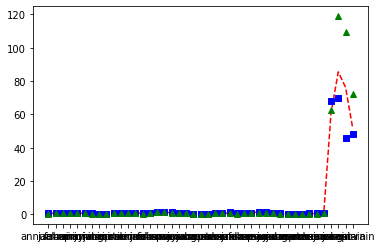

In [564]:
plt.plot(data_rmse["axis_label"], data_rmse["x"], 'r--', data_rmse["axis_label"], data_rmse["y"], 'bs', data_rmse["axis_label"], data_rmse["z"], 'g^')
plt.show()